In [1]:
# Import libraries
import os
import numpy as np

from plantcv import plantcv as pcv 
#from PIL import Image
#import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set the notebook display method
# inline = embedded plots, notebook = interactive plots
%matplotlib inline

In [3]:
plant_image_path = "/mnt/stor/ceph/csb/marsfarm/projects/inputs/MV1-0039_7.11.23-8.11.23(Tomato)/2023-07-14_0105.jpg"

In [4]:
# Read the first image in the datased to be used as reference for the ROIs
img0, _, _ = pcv.readimage(filename=plant_image_path)

In [5]:
import cv2
def detect_leaf_yellow_green(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # find the brown color
    #mask_brown = cv2.inRange(hsv, (8, 60, 20), (30, 255, 200))
    # find the yellow and green color in the leaf
    mask_yellow_green = cv2.inRange(hsv, (10, 39, 64), (86, 255, 255))
    # find any of the three colors(green or brown or yellow) in the image
    #mask = cv2.bitwise_or(mask_yellow_green, mask_brown)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img, img, mask=mask_yellow_green)
    return res

In [6]:
leaf_detected = detect_leaf_yellow_green(img0)

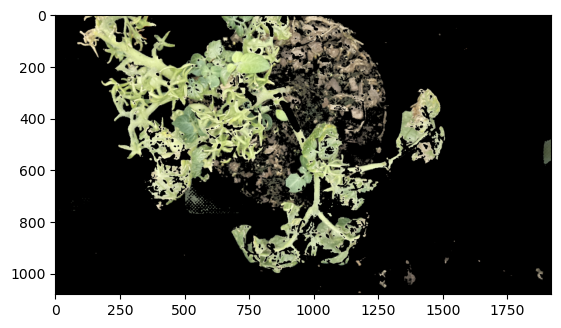

In [7]:
pcv.plot_image(leaf_detected)